# Project Overview
For this project, I will use regression modeling to analyze house sales in King County, a northwestern county in Washington State. The goal is to understand factors affecting house prices and provide actionable insights for a real estate agency.

# Business Problem
The stakeholder is a real estate agency that helps homeowners buy and sell homes. The task at hand is to provide advice on how different features of a house, including potential renovations, can affect its estimated value. The goal is to determine by how much certain renovations or features might increase the estimated value of homes.

##### Importing libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Loading data


In [2]:
df = pd.read_csv('data/kc_house_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'data/kc_house_data.csv'

#### Displaying the first rows of dataframe

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Data Cleaning and pre-processing

###### Information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

####  Data Describing 

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Checking for missing values

In [ ]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Conventing data to datetime format

In [ ]:
df['date'] = pd.to_datetime(df['date'])

#### Converting the 'sqft_above' and basement square foot columns to numbers/integers

In [ ]:
df['sqft_above'] = pd.to_numeric(df['sqft_above'], errors='coerce')
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

#### Replacing NaN values with 0 for the code above

In [ ]:
df['sqft_above'].fillna(0, inplace=True)
df['sqft_basement'].fillna(0, inplace=True)

#### Creation of new columns for total square feet and add the square feet for basement and above('sqft_above')

In [ ]:
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

In [ ]:
df=df.dropna()

#### Rows of the modified data

In [ ]:
df[['sqft_above', 'sqft_basement', 'total_sqft']].head()


,sqft_above,sqft_basement,total_sqft
1,2170,400.0,2570.0
3,1050,910.0,1960.0
4,1680,0.0,1680.0
5,3890,1530.0,5420.0
6,1715,0.0,1715.0


# EDA

Ploting graphs for distribution of house prices

A scatter plot for prices v square foot of living

The co-relation between the different features


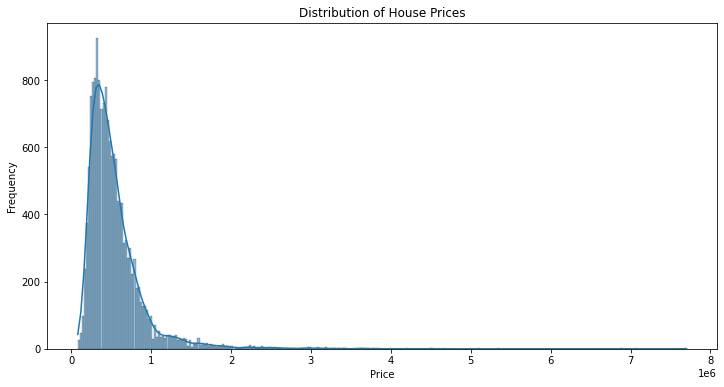

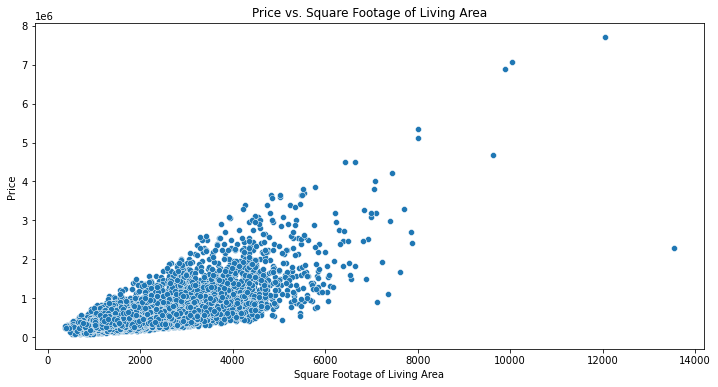

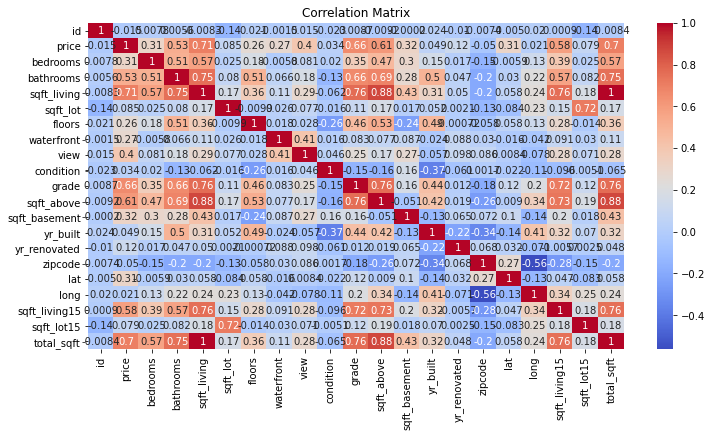

In [ ]:
# Plot distributions of key features
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of price vs. sqft_living
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### data feature selection 

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'total_sqft']
X = df[features]
y = df['price']

X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,total_sqft
1,3,2.25,2570,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,2570.0
3,4,3.00,1960,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1960.0
4,3,2.00,1680,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1680.0
5,4,4.50,5420,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,5420.0
6,3,2.25,1715,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,1715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1310.0
21592,3,2.50,1530,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530.0
21593,4,2.50,2310,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,2310.0
21594,2,0.75,1020,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020.0


#### Split the data into training and testing sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear regression model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

#### Model eveluation and interpretation

###### evaluation of model

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

RMSE: 189857.2338035246
MAE: 127054.59120473772
R^2: 0.7040135255024358


In [ ]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
4,waterfront,616921.549252
13,lat,609217.939167
7,grade,95683.638126
5,view,54953.448917
1,bathrooms,43737.004159
6,condition,26498.764375
3,floors,1008.659766
2,sqft_living,151.420892
8,sqft_above,31.645201
11,yr_renovated,25.074751


#### Relevant features affecting house prices from the Linear Regression

In [ ]:
significant_features = coefficients.head(3)['Feature'].tolist()
print(f'The three most significant features affecting house prices are: {significant_features}')

The three most significant features affecting house prices are: ['waterfront', 'lat', 'grade']


## Recommendations

#### I would make the following based on the 

# MULTIPLE REGRESSION

#### For multiple regression I will use the same data from the above regression and change the features so as to create a different model that will be able to predict numerous correlated variables to allow for the stakeholders and real estate agents in purchasing and selling of properties 

#### Introducing new feature, which involves the age of the house and whether has been renovated. 

In [ ]:
df['age'] = 2024 - df['yr_built']
df['was_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

#### Removing columns that are not as neccessart

In [ ]:
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long', 'yr_renovated'], axis=1)

#### Updated data

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,total_sqft,age,was_renovated
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1690,7639,2570.0,73,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,1360,5000,1960.0,59,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,1800,7503,1680.0,37,0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,4760,101930,5420.0,23,0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,2238,6819,1715.0,29,0


#### Second feature selection 

In [ ]:

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'age', 'was_renovated']
X = df[features]
y = df['price']

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age,was_renovated
1,3,2.25,2570,7242,2.0,3,7,73,1
3,4,3.00,1960,5000,1.0,5,7,59,0
4,3,2.00,1680,8080,1.0,3,8,37,0
5,4,4.50,5420,101930,1.0,3,11,23,0
6,3,2.25,1715,6819,2.0,3,7,29,0
...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,2.0,3,8,16,0
21592,3,2.50,1530,1131,3.0,3,8,15,0
21593,4,2.50,2310,5813,2.0,3,8,10,0
21594,2,0.75,1020,1350,2.0,3,7,15,0


#### Building of model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the train with the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Initial Model - Mean Squared Error: {mse}, R² Score: {r2}')


Initial Model - Mean Squared Error: 48048240142.315254, R² Score: 0.6054563542321092


#### Iterative modeling



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train_poly)

# Prediction 
y_pred_poly = ridge.predict(X_test_poly)

# model evaluation
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Model - Mean Squared Error: {mse_poly}, R² Score: {r2_poly}')

# Initialize and training regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train_poly)

# Predictions on the test set
y_pred_lasso = lasso.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test_poly, y_pred_lasso)
r2_lasso = r2_score(y_test_poly, y_pred_lasso)
print(f'Lasso Model - Mean Squared Error: {mse_lasso}, R² Score: {r2_lasso}')


c:\Users\Mwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.06449e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Polynomial Model - Mean Squared Error: 42461037190.2073, R² Score: 0.6513351505384993
Lasso Model - Mean Squared Error: 42552575355.865715, R² Score: 0.6505834934226756


c:\Users\Mwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263424804398483.84, tolerance: 179973770539.04727
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Final model and Interpretation

In [ ]:
#Final model and Interpretation
best_model = ridge if r2_poly > r2_lasso else lasso

best_model.fit(X_poly, y)

feature_names = poly.get_feature_names(features)

coefficients = best_model.coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

coef_df.head(10)


c:\Users\Mwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.02497e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


,Feature,Coefficient,AbsCoefficient
1,bathrooms,-214198.331358,214198.331358
5,condition,-139683.520981,139683.520981
53,was_renovated^2,130846.415208,130846.415208
8,was_renovated,130846.415207,130846.415207
6,grade,-119950.552542,119950.552542
25,bathrooms was_renovated,-64655.307975,64655.307975
47,condition was_renovated,-49397.676320,49397.676320
23,bathrooms grade,34685.591522,34685.591522
39,floors^2,32962.119357,32962.119357
21,bathrooms floors,-31527.643367,31527.643367


### RECOMMENDATIONS